In [9]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

In [10]:
font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto%5Bwdth,wght%5D.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')

In [32]:
URL = "D:/pythonProject/Eventos_Brasileirão/src/images/hulk.png"
fdj_cropped = Image.open(URL)

In [135]:
# parameter list
params = ["Gols sem penalt", "npxG", "xA", "xGOT",
          "Chutes", "Passes bem \nsucedidos", "Cruzamento bem \nsucedido",
          "Chances criadas", "Dribles conseguidos", "Toques", "Disputas Ganhas",
          "Jogo aéreo \nvencido", "Interc. \npressão ataque", "Recuperação", "Desarmes \nConseguidos"]

In [139]:
# value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
values = [70, 88, 95, 66, 97, 76, 96, 97, 92, 99, 76, 37, 96, 66, 65]

In [137]:
# color for the slices and text
slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

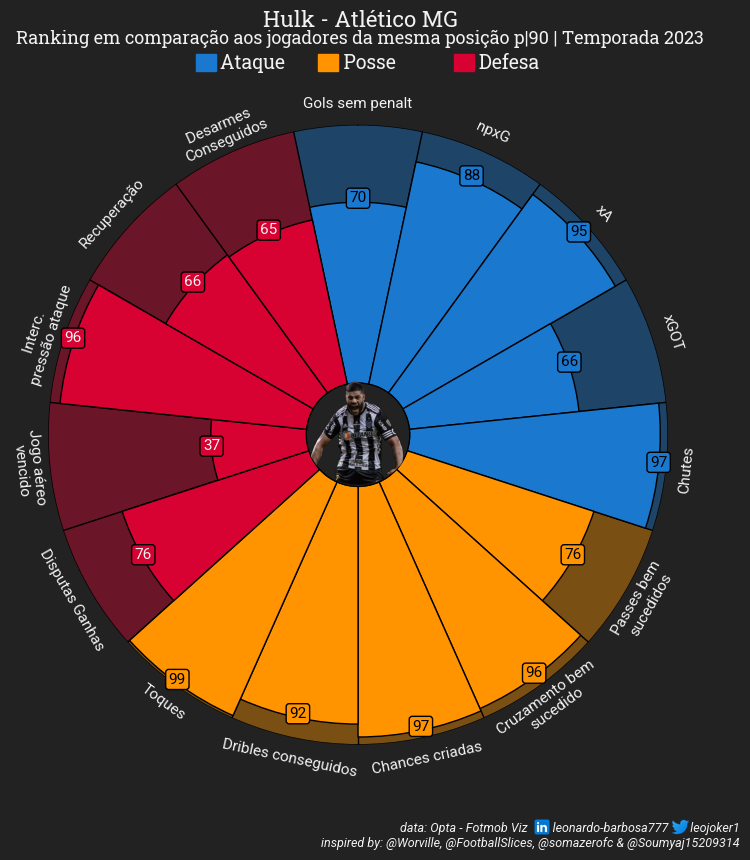

In [140]:
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# add title
fig.text(
    0.515, 0.975, "Hulk - Atlético MG", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.955,
    "Ranking em comparação aos jogadores da mesma posição p|90 | Temporada 2023",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: Opta - Fotmob Viz        leonardo-barbosa777       leojoker1"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.01, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#F2F2F2",
    ha="right"
)

# add text
fig.text(        
    0.34, 0.925, "Ataque            Posse                 Defesa", size=14,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])



# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.445, bottom=0.405, width=0.135, height=0.19
)   # these values might differ when you are plotting




# Adicione o ícone do Twitter
twitter_icon_path = "D:/pythonProject/Eventos_Brasileirão/src/images/x.png"  # Substitua pelo caminho correto
twitter_icon = Image.open(twitter_icon_path)
n_size = (20,20)
twitter_icon = twitter_icon.resize(n_size)
fig.figimage(twitter_icon, xo=670, yo=23, origin='upper')


# Adicione o ícone do linkedin
linkedin_icon_path = "D:/pythonProject/Eventos_Brasileirão/src/images/linkedin.png"  # Substitua pelo caminho correto
linkedin_icon = Image.open(linkedin_icon_path)
n_size = (20,20)
linkedin_icon = linkedin_icon.resize(n_size)
fig.figimage(linkedin_icon, xo=532, yo=23, origin='upper')

plt.show()